In [1]:
#read file 
import pandas as pd
script_df=pd.read_csv('scripts.csv')

In [2]:
df=script_df

In [4]:
df.head()

,Unnamed: 0,Character,Dialogue,EpisodeNo,SEID,Season
0,0,JERRY,Do you know what this is all about? Do you kno...,1.0,S01E01,1.0
1,1,JERRY,"(pointing at Georges shirt) See, to me, that b...",1.0,S01E01,1.0
2,2,GEORGE,Are you through?,1.0,S01E01,1.0
3,3,JERRY,"You do of course try on, when you buy?",1.0,S01E01,1.0
4,4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",1.0,S01E01,1.0


In [102]:
# sentiment analysis tool 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
#plotting tools 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [103]:
import statsmodels.api as sm
from sklearn import preprocessing
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import nltk
from nltk.tokenize import word_tokenize
np.random.seed(0)

In [157]:
from nltk.corpus import stopwords
import string 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [224]:
main_characters=['GEORGE', 'JERRY', 'ELAINE', 'NEWMAN', 'KRAMER']

In [245]:
dial_df_1 = df[(df["Character"]=="JERRY")| (df["Character"]=="ELAINE") | (df["Character"]=="GEORGE") | (df["Character"]=="KRAMER") |(df["Character"]=="NEWMAN")]


In [105]:
george_dialogue_df=script_df[script_df.Character=='GEORGE']
jerry_dialogue_df=script_df[script_df.Character=='JERRY']
elaine_dialogue_df=script_df[script_df.Character=='ELAINE']
kramer_dialogue_df=script_df[script_df.Character=='KRAMER']
newman_dialogue_df=script_df[script_df.Character=='NEWMAN']


144      Do you handle any of that commercial...real es...
458                                                    Hi.
461                  Hey Morty! (to Jerry) Salad dressing?
467                                 Quo? Thats not a word.
491      No, you dont have to challenge that. Thats a w...
493                             Quone. To quone something.
499      Nah, we need a medical dictionary! If a patien...
616      Uh, Jer, well you know, I was cookin and I, I ...
618                                   (guiltily) The door.
620      Yeah, well, I was gonna bring the spatula righ...
622      Well, I got caught up... watching a soap opera...
624                                             Wide open!
627      Look, Jerry, Im sorry, Im uh- you have insuran...
629              (shocked) How can you not have insurance?
631      Jerry! Im gonna find your stuff. Im gonna solv...
633                         (theatrical) I made a mistake.
635                                              Im huma

In [366]:
print(len(jerry_dialogue_df), len (george_dialogue_df), (len (elaine_dialogue_df)), len (kramer_dialogue_df), len (newman_dialogue_df))

14786 9708 7983 6664 640


In [369]:
bar_df=pd.DataFrame()
bar_df['Character']=['JERRY','GEORGE','ELAINE', 'KRAMER', 'NEWMAN']
bar_df['line_count']=[14786, 9708, 7983, 6664, 640]
bar_df

,Character,line_count
0,JERRY,14786
1,GEORGE,9708
2,ELAINE,7983
3,KRAMER,6664
4,NEWMAN,640


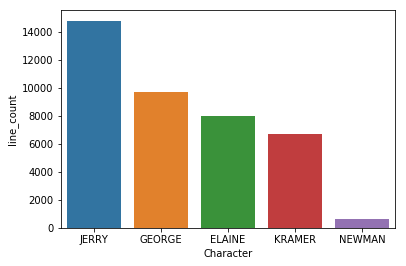

In [370]:
sns.barplot(y="line_count",x="Character",data=bar_df)

In [169]:
def combine_dialogues(dialogue):
    dialogues=''
    for i in dialogue: 
        dialogues=dialogues+(i)
    return dialogues

In [298]:
kramer_dialogues=combine_dialogues(kramer_dialogue_df.Dialogue)
newman_dialogues=combine_dialogues(newman_dialogue_df.Dialogue)
jerry_dialogues=combine_dialogues(jerry_dialogue_df.Dialogue)
george_dialogues=combine_dialogues(george_dialogue_df.Dialogue)
elaine_dialogues=combine_dialogues(elaine_dialogue_df.Dialogue)

In [373]:
kramer_dialogues

AttributeError: 'str' object has no attribute 'unique'

In [299]:
main_characters=pd.DataFrame()
main_characters['Character']=['JERRY', 'GEORGE', 'ELAINE', 'KRAMER', 'NEWMAN' ]
main_characters['Dialogues']=[jerry_dialogues, george_dialogues, elaine_dialogues, kramer_dialogues, newman_dialogues]
main_characters.head()

,Character,Dialogues
0,JERRY,Do you know what this is all about? Do you kno...
1,GEORGE,"Are you through?Yes, it was purple, I liked it..."
2,ELAINE,Coccoon II The Return. I guess they didnt like...
3,KRAMER,Do you handle any of that commercial...real es...
4,NEWMAN,Kramer!I'm on the roof!I can't. I'm goin' to a...


In [300]:
from sklearn.feature_extraction import text
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)

In [301]:

def lines(dialogue):
    dialogue = word_tokenize(dialogue)
    nopunc=[word.lower() for word in dialogue if word not in stop_words]
    nopunc=' '.join(nopunc)
    return [word for word in nopunc.split()]

In [302]:
main_characters["Dialogues"] = main_characters["Dialogues"].apply(lambda x: lines(x))

In [417]:
main_characters

,Character,Dialogues,words_spoken
0,JERRY,"[do, know, do, know, to, ..., single, enjoyabl...",87562
1,GEORGE,"[are, yes, purple, i, liked, i, dont, actually...",65235
2,ELAINE,"[coccoon, ii, the, return, i, guess, didnt, li...",45679
3,KRAMER,"[do, handle, commercial, ..., real, estate, hi...",43782
4,NEWMAN,"[kramer, i, 'm, roof, i, ca, n't, i, 'm, goin,...",4242


In [418]:
jerry=main_characters["Dialogues"][0]
newman=main_characters["Dialogues"][4]

In [ ]:
from collections import Counter
jerrywords=dict(Counter(jerry))

In [419]:
[(k, jerrywords[k]) for k in sorted(jerrywords, key=jerrywords.get, reverse=True)][10]

('just', 787)

In [422]:
newmanwords=dict(Counter(newman))
[(k, newmanwords[k]) for k in sorted(newmanwords, key=newmanwords.get, reverse=True)]

[('i', 273),
 ("'s", 138),
 ("n't", 104),
 ('jerry', 59),
 ('kramer', 54),
 ('you', 54),
 ("'m", 44),
 ('...', 44),
 ('know', 40),
 ("'re", 37),
 ('right', 35),
 ('got', 34),
 ('mail', 27),
 ('just', 26),
 ('did', 24),
 ('what', 24),
 ('it', 23),
 ("'ll", 23),
 ('like', 22),
 ('going', 21),
 ('but', 20),
 ('well', 19),
 ('and', 19),
 ("'ve", 18),
 ('ca', 17),
 ('ha', 17),
 ('tell', 16),
 ('yes', 16),
 ('hey', 16),
 ('oh', 15),
 ('no', 14),
 ('na', 14),
 ('the', 14),
 ('all', 13),
 ('we', 13),
 ('little', 13),
 ('hello', 12),
 ('day', 12),
 ('let', 12),
 ('so', 12),
 ('that', 12),
 ('really', 12),
 ('hear', 11),
 ('way', 11),
 ('friend', 11),
 ('-', 11),
 ('a', 11),
 ('doing', 11),
 ('help', 10),
 ('gon', 10),
 ('he', 10),
 ('do', 10),
 ('uh', 10),
 ('come', 10),
 ('ta', 10),
 ('mean', 10),
 ('your', 10),
 ('newman', 10),
 ('think', 10),
 ('elaine', 9),
 ('thing', 9),
 ('man', 9),
 ('say', 8),
 ('happened', 8),
 ('are', 8),
 ('away', 8),
 ('time', 8),
 ('believe', 8),
 ('love', 8),
 ('t

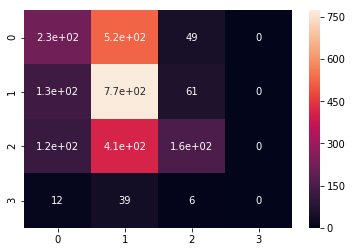

In [363]:
sns.heatmap(confusion_matrix(y_test, predict),annot=True)
ax.set_yticklabels(confusion_matrix(y_test,predict))
#plt.savefig('confusion_matrix_1.png')
plt.show()

main_characters['words_spoken']=main_characters["Dialogues"].apply(lambda x: len(x))

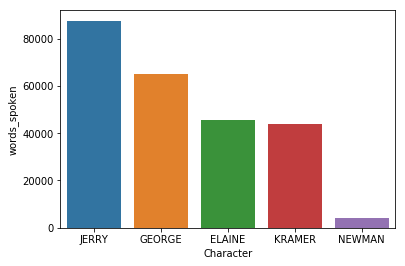

<Figure size 432x288 with 0 Axes>

In [364]:
plt.show(sns.barplot(y="words_spoken",x="Character",data=main_characters))
plt.savefig('character_word_count.png')

In [378]:
def column_count(dataframe ,column):
    count=[]
    column_types= [i for i in column.unique()] 
    for c in column_types: 
        count.append((c, len(dataframe[column==c])))    
    return dict(count)

In [382]:
column_count(main_characters ,main_characters["Dialogues"][0]) 

AttributeError: 'list' object has no attribute 'unique'

In [264]:
dial_df = df[(df["Character"]=="ELAINE") | (df["Character"]=="GEORGE") | (df["Character"]=="KRAMER") | (df["Character"]=="NEWMAN")]
dial_df.head()


,Unnamed: 0,Character,Dialogue,EpisodeNo,SEID,Season
2,2,GEORGE,Are you through?,1.0,S01E01,1.0
4,4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",1.0,S01E01,1.0
6,6,GEORGE,"(on an imaginary microphone) Uh, no, not at th...",1.0,S01E01,1.0
9,9,GEORGE,"Are, are you sure this is decaf? Wheres the or...",1.0,S01E01,1.0
13,13,GEORGE,How come youre not doin the second show tomorrow?,1.0,S01E01,1.0


In [265]:
def text_process(dialogue):
    nopunc=[word.lower() for word in dialogue if word not in stop_words]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split()]

In [268]:
X = dial_df["Dialogue"]
y = dial_df["Character"]

In [269]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer=text_process).fit(X)
print(len(vectorizer.vocabulary_))
X = vectorizer.transform(X)

14466


In [270]:
# Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [271]:
from sklearn.naive_bayes import MultinomialNB as MNB
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import VotingClassifier as VC
mnb = MNB(alpha=10)
lr = LR(random_state=101)
rfc = RFC(n_estimators=80, criterion="entropy", random_state=42, n_jobs=-1)
clf = VC(estimators=[('mnb', mnb), ('lr', lr), ('rfc', rfc)], voting='hard')

In [272]:
# Fitting and predicting
clf.fit(X_train,y_train)
predict = clf.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [273]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))


[[226 521  49   0]
 [129 773  61   0]
 [115 413 156   0]
 [ 12  39   6   0]]


             precision    recall  f1-score   support

     ELAINE       0.47      0.28      0.35       796
     GEORGE       0.44      0.80      0.57       963
     KRAMER       0.57      0.23      0.33       684
     NEWMAN       0.00      0.00      0.00        57

avg / total       0.48      0.46      0.42      2500



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [211]:
def predictor(s):
    s = vectorizer.transform(s)
    pre = clf.predict(s)
    print(pre)

In [275]:
#larry
predictor(['You know who wears sunglasses inside? Blind people and assholes.'])

['GEORGE']


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [276]:
#larry
predictor(["Do you respect wood?"])

['GEORGE']


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [277]:
#larry
predictor(['Let’s go upstairs and all get under the covers and sob!'])

['GEORGE']


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [274]:
#KRAMER
predictor(['I\'m on the Mexican, whoa oh oh, radio.'])

['KRAMER']


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [213]:
predictor(['Do you have any idea how much time I waste in this apartment?'])

['GEORGE']


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [278]:
#george
predictor(["Heh, haa. And that's no good. I've tried it straight, Jerry. We've all seen the results. For me, sick is the only way to go."])

['GEORGE']


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [280]:
#george
predictor(["Yep. Classic horseshoe pattern. I've seen a lot of this."])

['GEORGE']


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [279]:
#george
predictor(["Well, anything I can do to help, um...she's a wonderful girl. Very smart. Very eh...crafty."])

['GEORGE']


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [215]:
#elaine 
predictor(["Jerry, I don't know how much longer I can keep this up. They're starting to give Susie assignments now!"])

['ELAINE']


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [216]:
#jerry 
predictor(["I guess they leave that up to the general population"])

['GEORGE']


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [218]:
#jerry
predictor(["What's the difference? I agreed to wear it. It's - it's a puffy shirt. I feel ridiculous in it, and I think it's the stupidest shirt I've ever seen, to be perfectly honest with you. (Nodding)"])

['GEORGE']


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [230]:
dial_df_1.head()

,Unnamed: 0,Character,Dialogue,EpisodeNo,SEID,Season
0,0,JERRY,Do you know what this is all about? Do you kno...,1.0,S01E01,1.0
1,1,JERRY,"(pointing at Georges shirt) See, to me, that b...",1.0,S01E01,1.0
2,2,GEORGE,Are you through?,1.0,S01E01,1.0
3,3,JERRY,"You do of course try on, when you buy?",1.0,S01E01,1.0
4,4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",1.0,S01E01,1.0


In [246]:
X = dial_df_1["Dialogue"]
y = dial_df_1["Character"]

In [247]:
vectorizer = TfidfVectorizer(analyzer=text_process).fit(X)
X = vectorizer.transform(X)

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
mnb = MNB(alpha=10)
lr = LR(random_state=101)
rfc = RFC(n_estimators=80, criterion="entropy", random_state=42, n_jobs=-1)
clf = VC(estimators=[('mnb', mnb), ('lr', lr), ('rfc', rfc)], voting='hard')
clf.fit(X_train,y_train)
predict = clf.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [249]:
print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))


[[  78   51  661   15    0]
 [  43  149  795   14    0]
 [  53   75 1337   28    0]
 [  32   46  461   77    0]
 [   6    4   51    3    0]]


             precision    recall  f1-score   support

     ELAINE       0.37      0.10      0.15       805
     GEORGE       0.46      0.15      0.22      1001
      JERRY       0.40      0.90      0.56      1493
     KRAMER       0.56      0.12      0.20       616
     NEWMAN       0.00      0.00      0.00        64

avg / total       0.43      0.41      0.33      3979



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [250]:
#jerry
predictor(["What's the difference? I agreed to wear it. It's - it's a puffy shirt. I feel ridiculous in it, and I think it's the stupidest shirt I've ever seen, to be perfectly honest with you. (Nodding)"])

['JERRY']


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [251]:
#george
predictor(["I can't tell you, don't ask."])

['JERRY']


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [252]:
#george 
predictor(["That's my whole afternoon! I was going to look for sneakers."])

['JERRY']


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [253]:
#george
predictor(["Hey look a that - boy are you lucky - another great spot - right in front of the hospital. In an emergency yet! How lucky are you huh? Is that unbelievable? How unbelievable is that huh? Come on, give it to me, give it to me."])

['JERRY']


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [256]:
#larry 
predictor(["I'm feeling pretty good. Pretty, pretty, pretty, pretty good."])

['JERRY']


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [257]:
#larry
predictor(["He wanted to stop and chat with me - and I don't know him well enough for a stop and chat."])

['JERRY']


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
#larry
predictor([''])

In [259]:
#george
predictor(["Yeah I guess. What can I do? I gotta take her with me. Todd introduced us, I'm obligated."])

['GEORGE']


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [260]:
#george

predictor(['Boy you are really smitten.'])

['JERRY']


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [340]:
df=pd.read_csv('scripts.csv')

In [341]:
dial_df = df.drop(["EpisodeNo","SEID","Season"],axis=1)


In [345]:
def corpus_creator(name):
    st = "" 
    for i in dial_df["Dialogue"][dial_df["Character"]==name]:
        st = st + i
    return st

corpus_df = pd.DataFrame()
corpus_df["Character"] = list(dial_df["Character"].value_counts().head(6).index)

li = []
for i in corpus_df["Character"]:
    li.append(corpus_creator(i))

corpus_df["Dialogues"] = li

corpus_df.Character.unique()

array(['JERRY', 'GEORGE', 'ELAINE', 'KRAMER', 'NEWMAN', 'MORTY'],
      dtype=object)

In [346]:
corpus_df["Dialogues"] = corpus_df["Dialogues"].apply(lambda x: text_processor(x))

In [347]:
corpus_df["Length"] = corpus_df["Dialogues"].apply(lambda x: len(x))

In [348]:
import gensim
# Creating a dictionary for mapping every word to a number
dictionary = gensim.corpora.Dictionary(corpus_df["Dialogues"])
print(dictionary[567])
print(dictionary.token2id['cereal'])
print("Number of words in dictionary: ",len(dictionary))



# Now, we create a corpus which is a list of bags of words. A bag-of-words representation for a document just lists the number of times each word occurs in the document.
corpus = [dictionary.doc2bow(bw) for bw in corpus_df["Dialogues"]]

# Now, we use tf-idf model on our corpus
tf_idf = gensim.models.TfidfModel(corpus)

# Creating a Similarity objectr
sims = gensim.similarities.Similarity('',tf_idf[corpus],num_features=len(dictionary))


admiration
2504
Number of words in dictionary:  31600


/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:718: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [423]:

# Creating a dataframe out of similarities
sim_list = []
for i in range(6):
    query = dictionary.doc2bow(corpus_df["Dialogues"][i])
    query_tf_idf = tf_idf[query]
    sim_list.append(sims[query_tf_idf])
sim_list
    


[array([1.0000743 , 0.41524112, 0.35393906, 0.3000297 , 0.06328574,
        0.03956334], dtype=float32),
 array([0.41524112, 0.99995434, 0.31050402, 0.26005393, 0.0571247 ,
        0.02625971], dtype=float32),
 array([0.35393906, 0.31050402, 1.0000447 , 0.23241226, 0.04512492,
        0.02293793], dtype=float32),
 array([0.3000297 , 0.26005393, 0.23241226, 1.0000694 , 0.05947205,
        0.02255212], dtype=float32),
 array([0.06328574, 0.0571247 , 0.04512492, 0.05947205, 1.0000012 ,
        0.00430569], dtype=float32),
 array([0.03956334, 0.02625971, 0.02293793, 0.02255212, 0.00430569,
        1.0000023 ], dtype=float32)]

In [424]:
corr_df = pd.DataFrame()
j=0
for i in corpus_df["Character"]:
    corr_df[i] = sim_list[j]
    j = j + 1   
j

6

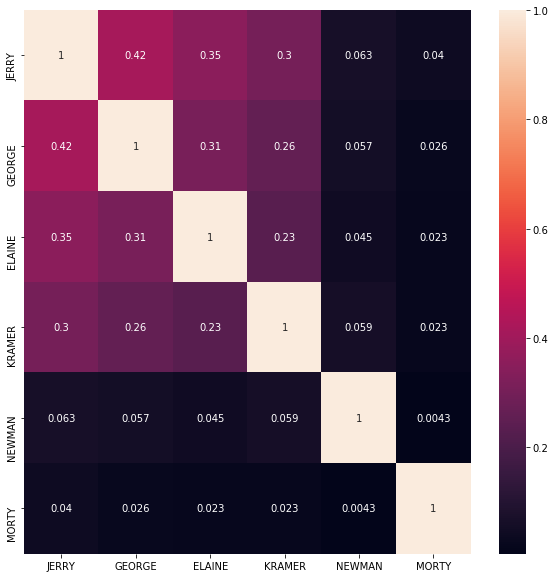

In [360]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_df,ax=ax,annot=True)
ax.set_yticklabels(corpus_df.Character)
plt.savefig('similarity.png')
plt.show()

,Unnamed: 0,Character,Dialogue
0,0,JERRY,Do you know what this is all about? Do you kno...
1,1,JERRY,"(pointing at Georges shirt) See, to me, that b..."
2,2,GEORGE,Are you through?
3,3,JERRY,"You do of course try on, when you buy?"
4,4,GEORGE,"Yes, it was purple, I liked it, I dont actuall..."
5,5,JERRY,"Oh, you dont recall?"
6,6,GEORGE,"(on an imaginary microphone) Uh, no, not at th..."
7,7,JERRY,"Well, senator, Id just like to know, what you ..."
8,8,CLAIRE,Mr. Seinfeld. Mr. Costanza.
9,9,GEORGE,"Are, are you sure this is decaf? Wheres the or..."
